In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 10:  
Assess the χ2 value for the fit performed in Exercise 1 (do that problem first if you haven’t already). Is the fit good? What about for the fit performed in Exercise 2?

In [3]:
# ID, x, y, s_y, s_x, r_xy
Table1 = np.array([[1,  201, 592, 61, 9,  -0.84],
[2,  244, 401, 25, 4,  0.31],
[3,  47,  583, 38, 11, 0.64],
[4,  287, 402, 15, 7,  -0.27],
[5,  203, 495, 21, 5,  -0.33],
[6,  58,  173, 15, 9,  0.67],
[7,  210, 479, 27, 4,  -0.02],
[8,  202, 504, 14, 4,  -0.05],
[9,  198, 510, 30, 11, -0.84],
[10, 158, 416, 16, 7,  -0.69],
[11, 165, 393, 14, 5,  0.30],
[12, 201, 442, 25, 5,  -0.46],
[13, 157, 317, 52, 5,  -0.03],
[14, 131, 311, 16, 6,  0.50],
[15, 166, 400, 34, 6,  0.73],
[16, 160, 337, 31, 5,  -0.52],
[17, 186, 423, 42, 9,  0.90],
[18, 125, 334, 26, 8,  0.40],
[19, 218, 533, 16, 6,  -0.78],
[20, 146, 344, 22, 5,  -0.56]])

In [4]:
x = Table1[4:,1]
y = Table1[4:,2]
sy = Table1[4:,3]
sx = Table1[4:,4]
rxy = Table1[4:,5]

A = np.c_[x/x,x]

C = np.eye(sy.size)*(sy**2)

Fitting a straight line:   
    $y = mx + b$

m=2.2399208316310926,b=34.047727757542816


(0.0, 700.0)

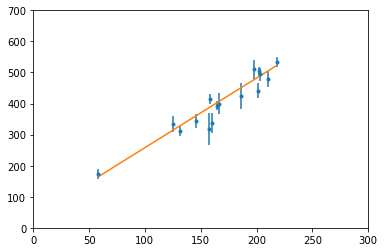

In [8]:


AT_Cinv_A = (A.T).dot(np.linalg.inv(C).dot(A))
AT_Cinv_Y = (A.T).dot(np.linalg.inv(C).dot(y))

b,m =  np.linalg.inv(AT_Cinv_A).dot(AT_Cinv_Y)

print(f'm={m},b={b}')

plt.figure()

plt.errorbar(x,y, yerr=sy, fmt='.')
x = np.sort(x)
plt.plot(x,m*x+b)

plt.xlim(0,300)
plt.ylim(0,700)

In [9]:
X = np.array([b,m])


In [12]:
U = y-A.dot(X)
chi_sq = (U.T).dot(np.linalg.inv(C).dot(U))

In [13]:
chi_sq

18.68076991124081

In [14]:
# "Good value": chi_sq = N-2 \pm sqrt(2(N-2))
N = y.size
print(N-2 + np.sqrt(2*N-4),N-2 - np.sqrt(2*N-4))

19.29150262212918 8.708497377870819


So yes the fit seems good.

### Exercise 10: part 2 


(0.0, 700.0)

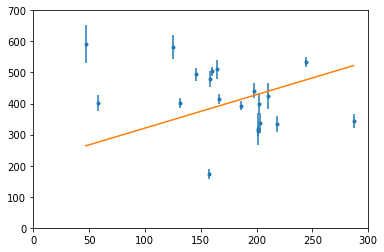

In [20]:
x = Table1[:,1]
y = Table1[:,2]
sy = Table1[:,3]
sx = Table1[:,4]
rxy = Table1[:,5]

A = np.c_[x/x,x]

C = np.eye(sy.size)*(sy**2)

AT_Cinv_A = (A.T).dot(np.linalg.inv(C).dot(A))
AT_Cinv_Y = (A.T).dot(np.linalg.inv(C).dot(y))

b,m =  np.linalg.inv(AT_Cinv_A).dot(AT_Cinv_Y)

plt.figure()
x = np.sort(x)


plt.errorbar(x,y, yerr=sy, fmt='.')
plt.plot(x,m*x+b)

plt.xlim(0,300)
plt.ylim(0,700)

In [21]:
X = np.array([b,m])

In [22]:
U = y-A.dot(X)
chi_sq = (U.T).dot(np.linalg.inv(C).dot(U))

In [23]:
chi_sq

289.9637227819993

In [24]:
# "Good value": chi_sq = N-2 \pm sqrt(2(N-2))
N = y.size
print(N-2 + np.sqrt(2*N-4),N-2 - np.sqrt(2*N-4))

24.0 12.0


And now clearly the fit is bad

### Exercise 11: 
Re-do the fit of Exercise 1 but setting all σy2i = S, that is,
ignoring the uncertainties and replacing them all with the same
value S. What uncertainty variance S would make χ2 = N − 2? Relevant
plots are shown in Figure 7. How does it compare to the mean and
median of the uncertainty variances {σy2i}Ni=1?

In [35]:
x = Table1[4:,1]
y = Table1[4:,2]
sx = Table1[4:,4]
rxy = Table1[4:,5]

A = np.c_[x/x,x]

s_list = np.linspace(20,1500,100)
chi_sq = np.zeros_like(s_list)
for i, s in enumerate(s_list):
    sy = np.ones_like(x)*np.sqrt(s)
    C = np.eye(sy.size)*(sy**2)

    AT_Cinv_A = (A.T).dot(np.linalg.inv(C).dot(A))
    AT_Cinv_Y = (A.T).dot(np.linalg.inv(C).dot(y))

    b,m =  np.linalg.inv(AT_Cinv_A).dot(AT_Cinv_Y)

    
    X = np.array([b,m])
    U = y-A.dot(X)
    chi_sq[i] = (U.T).dot(np.linalg.inv(C).dot(U))

(0.0, 50.0)

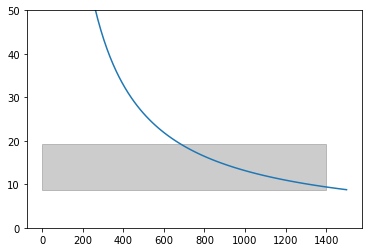

In [37]:
plt.plot(s_list, chi_sq)
# "Good value": chi_sq = N-2 \pm sqrt(2(N-2))
N = y.size
plt.fill_between([0,1400],N-2 + np.sqrt(2*N-4),N-2 - np.sqrt(2*N-4), alpha=0.2, color='k')
plt.ylim(0,50)

In [38]:
sy = Table1[:,3]

print(np.mean(sy),np.median(sy))

27.0 25.0


so... a very large value for sy makes the fit good.